In [1]:
from base import GBM, Option
import torch
import matplotlib.pyplot as plt



# ITM call

In [2]:
mu, sig = 0.02, 0.15
x0, strike = 1.0, 1.0
dt, T = 0.01, 1.0

call = Option(mu, sig, x0, strike, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
call.simulate()
call.compute_payoff()
print('price', call.price)
print('delta', call.compute_delta())
call.black_scholes(print_=True)

Simulation done
price 0.06940536864922242
delta 0.5931674242019653
price: 0.070
Delta: 0.583
Gamma: 2.603


0.06961840391159058

# OTM call

In [3]:
mu, sig = 0.02, 0.15
x0, strike = 1, 1.1
dt, T = 0.01, 1.0

call = Option(mu, sig, x0, strike, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
call.simulate()
call.compute_payoff()
print('price', call.price)
print('delta', call.compute_delta())
call.black_scholes(print_=True)

Simulation done
price 0.030488178572249947
delta 0.34228307008743286
price: 0.031
Delta: 0.335
Gamma: 2.428


0.030664682388305664

# ITM call, everything else same but higher S0

In [4]:
mu, sig = 0.02, 0.15
x0, strike = 5.0, 5.0
dt, T = 0.01, 1.0

call = Option(mu, sig, x0, strike, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
call.simulate()
call.compute_payoff()
print('price: {:.3f}'.format(call.price))
print('delta: {:.3f}'.format(call.compute_delta()))

call.black_scholes(print_=True)

Simulation done
price: 0.347


delta: 0.595
price: 0.348
Delta: 0.583
Gamma: 0.521


0.34809207916259766

# risk-free rate = 0, compare call and put

In [5]:
mu, sig = 0.0, 0.15
x0, strike = 100.0, 100.0 # ITM, as K = S0 *e^rT
dt, T = 0.01, 1.0

call = Option(mu, sig, x0, strike, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
put = Option(mu, sig, x0, strike, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
print('call')
call.black_scholes(print_=True)
print('put')
put.black_scholes(print_=True)

call
price: 5.979
Delta: 0.530
Gamma: 0.027
put
price: 5.979
Delta: -0.470
Gamma: 0.027


5.978527069091797

# 10% OTM call and put

In [6]:
mu, sig = 0.0, 0.15
x0 = 100.0
dt, T = 0.01, 1.0

call = Option(mu, sig, x0, strike=x0+10, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
put = Option(mu, sig, x0, strike=x0-10, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
call.black_scholes(print_=True)
put.black_scholes(print_=True)

price: 2.500
Delta: 0.288
Gamma: 0.023
price: 2.022
Delta: -0.218
Gamma: 0.020


2.0217323303222656

# 10% ITM call vs put

In [7]:
call = Option(mu, sig, x0, strike=x0-10, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
put = Option(mu, sig, x0, strike=x0+10, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
print('call')
call.black_scholes(print_=True)
print('put')
put.black_scholes(print_=True)

call
price: 12.022
Delta: 0.782
Gamma: 0.020
put
price: 12.500
Delta: -0.712
Gamma: 0.023


12.500244140625

# Test for 10% OTM call vs put with wide range of initial stock price

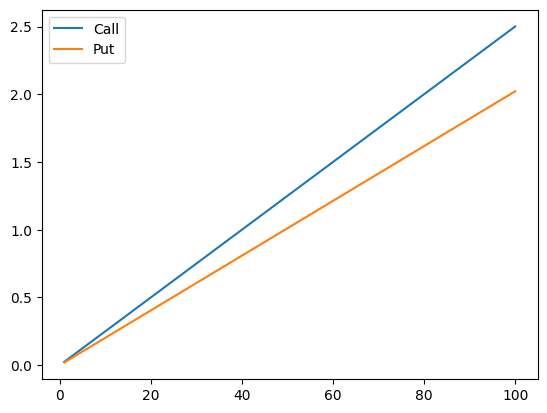

In [ ]:
# test for wide range of x0
x0 = torch.linspace(1, 100, 100)
call_payoff = []
put_payoff = []
for i in range(100):
    call = Option(mu, sig, x0[i], strike=x0[i] * 1.1, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
    call_payoff.append(call.black_scholes(print_=False))
    put = Option(mu, sig, x0[i], strike=x0[i] * 0.9, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
    put_payoff.append(put.black_scholes(print_=False))

plt.figure(figsize=(8, 4))
plt.plot(x0, call_payoff, label='Call')
plt.plot(x0, put_payoff, label='Put')
plt.legend()
plt.show()

# now 10% ITM comparison

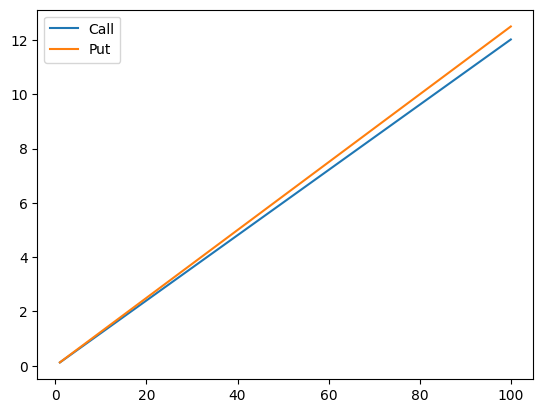

In [ ]:
x0 = torch.linspace(1, 100, 100)
call_payoff = []
put_payoff = []
for i in range(100):
    call = Option(mu, sig, x0[i], strike=x0[i] * 0.9, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
    call_payoff.append(call.black_scholes(print_=False))
    put = Option(mu, sig, x0[i], strike=x0[i] * 1.1, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
    put_payoff.append(put.black_scholes(print_=False))

plt.figure(figsize=(8, 4))
plt.plot(x0, call_payoff, label='Call')
plt.plot(x0, put_payoff, label='Put')
plt.legend()
plt.show()

# fix everything else (including K), vary S0 and compare delta between call and put

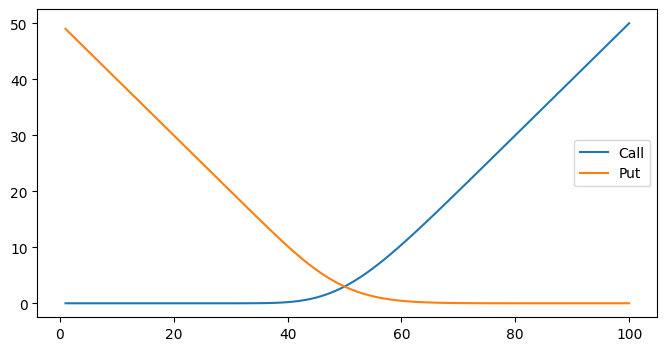

In [12]:
# fix everything else (including K), vary S0 and compare delta between call and put
x0 = torch.linspace(1, 100, 100)
call_payoff = []
put_payoff = []
for i in range(100):
    call = Option(mu, sig, x0[i], strike=50, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
    call_payoff.append(call.black_scholes(print_=False))
    put = Option(mu, sig, x0[i], strike=50, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
    put_payoff.append(put.black_scholes(print_=False))

plt.figure(figsize=(8, 4))
plt.plot(x0, call_payoff, label='Call')
plt.plot(x0, put_payoff, label='Put')
plt.legend()
plt.show()

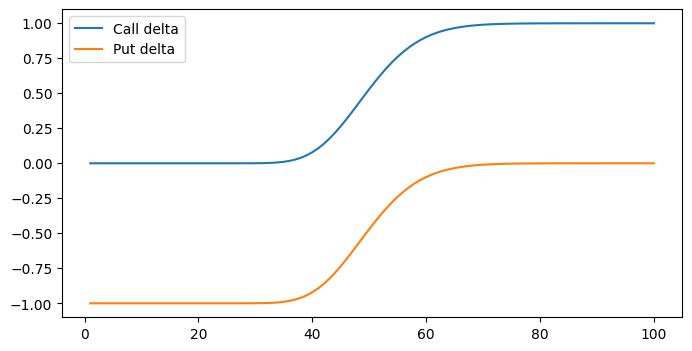

In [13]:
# fix everything else (including K), vary S0 and compare delta between call and put
x0 = torch.linspace(1, 100, 100)
call_payoff = []
put_payoff = []
for i in range(100):
    call = Option(mu, sig, x0[i], strike=50, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
    call_payoff.append(call.black_scholes(return_delta=True))
    put = Option(mu, sig, x0[i], strike=50, dt = 0.01, n_paths=100000, option_type='Put', device='cuda')
    put_payoff.append(put.black_scholes(return_delta=True))

plt.figure(figsize=(8, 4))
plt.plot(x0, call_payoff, label='Call delta')
plt.plot(x0, put_payoff, label='Put delta')
plt.legend()
plt.show()

some more ideas:

Write whole thing in C++

use real stock data for IV plot

add more greeks, understand different greeks for ITM, ATM, OTM calls/puts